<a href="https://colab.research.google.com/github/Vedagna-2105/Fruit-Recognition/blob/main/fruit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. Importing Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# 2. Mount Drive and Define Paths
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/minidata/Training'
test_path = '/content/drive/MyDrive/minidata/Test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining image size and batch
img_size = (224, 224)
batch_size = 32

# Creating generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Loading test set (without validation split)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# TO get class names
class_names = list(train_generator.class_indices.keys())


Found 5441 images belonging to 14 classes.
Found 1357 images belonging to 14 classes.
Found 2286 images belonging to 14 classes.


In [7]:

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [8]:

# 6. COMPILE AND TRAIN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.7245 - loss: 0.9625 - val_accuracy: 0.9772 - val_loss: 0.0510
Epoch 2/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9966 - loss: 0.0202 - val_accuracy: 0.9867 - val_loss: 0.0272
Epoch 3/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.9991 - loss: 0.0088 - val_accuracy: 0.9971 - val_loss: 0.0122
Epoch 4/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9989 - loss: 0.0056 - val_accuracy: 0.9742 - val_loss: 0.0508
Epoch 5/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9904 - val_loss: 0.0239
Epoch 6/10
171/171 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9632 - val_loss: 0.1125


72/72 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 1.0000 - loss: 0.0012

✅ Test Accuracy: 100.00%
72/72 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step

Classification Report:

               precision    recall  f1-score   support

      Apple 5       1.00      1.00      1.00       146
     Banana 1       1.00      1.00      1.00       166
     Cherry 1       1.00      1.00      1.00       179
      Dates 1       1.00      1.00      1.00       166
Grape White 1       1.00      1.00      1.00       166
      Guava 1       1.00      1.00      1.00       166
       Kiwi 1       1.00      1.00      1.00       156
     Lychee 1       1.00      1.00      1.00       166
      Mango 1       1.00      1.00      1.00       166
     Orange 1       1.00      1.00      1.00       160
     Papaya 1       1.00      1.00      1.00       164
Pomegranate 1       1.00      1.00      1.00       164
 Strawberry 1       1.00      1.00      1.00       164
 Watermelon 1       1.00      1.00      1.00       157

     acc

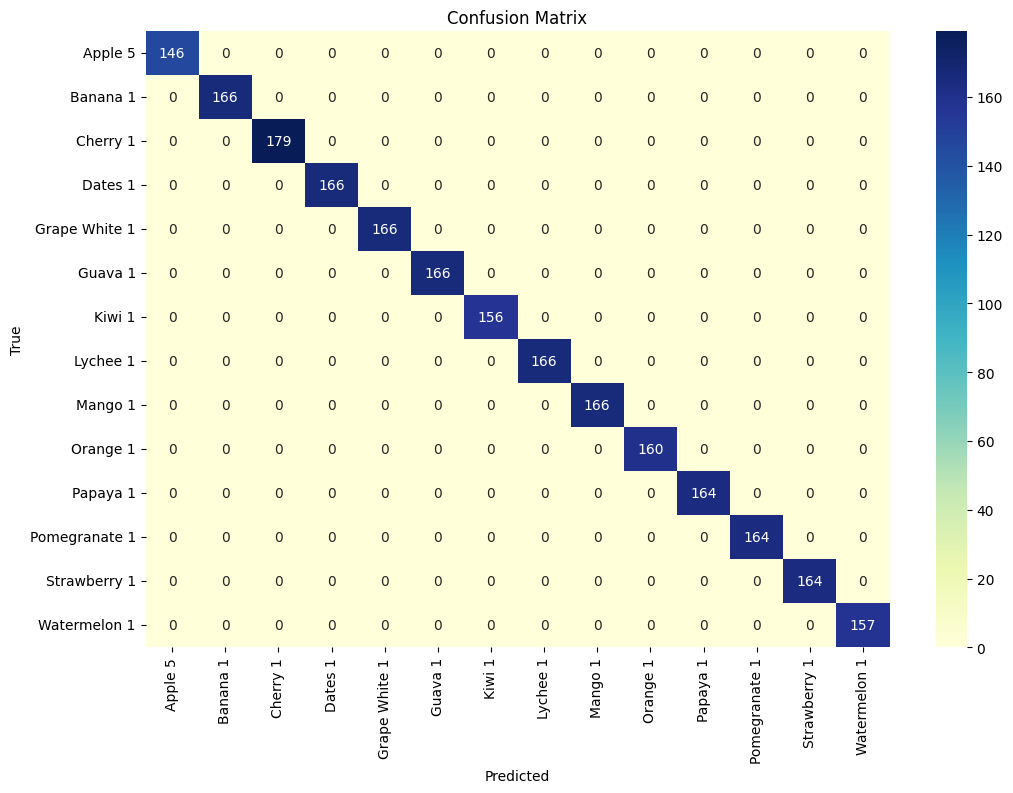

In [9]:
loss, accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# 8. CONFUSION MATRIX & CLASSIFICATION REPORT
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [13]:
import cv2

def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return class_names[class_index]

print("\n🔍 Sample Prediction:")
print(predict_image('/content/Screenshot 2025-07-19 011725.png'))


🔍 Sample Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Strawberry 1


In [14]:
model.save('/content/drive/MyDrive/fruit_classifier_mobilenet.keras')
print("✅ Model saved to Google Drive.")

✅ Model saved to Google Drive.
